In [1]:
import numpy as np
import pandas as pd

batting = pd.read_csv("batting_6agg.csv")

batting.head()

,player_id,start_year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,castrra01,1999,207,466,40,99,17,0,18,53,0,0,56,116,15,2,1,6,7
1,wisede01,2000,147,296,41,60,13,5,9,30,12,1,14,48,1,2,2,1,1
2,jeterde01,1995,786,3130,605,1008,153,35,78,414,108,37,341,572,11,48,23,23,66
3,husonje01,1988,462,1143,153,266,42,9,6,85,43,14,136,148,7,3,28,10,29
4,izturce01,2001,658,2437,261,632,111,22,11,191,59,34,121,259,15,6,38,13,41


In [2]:
yvals = pd.read_csv('yvals_avg_rc.csv')

yvals.head()

,player_id,rc_per_ab
0,castrra01,0.130536
1,wisede01,0.098631
2,jeterde01,0.142526
3,husonje01,0.076525
4,izturce01,0.081895


In [8]:
#create classifier

from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(activation='relu', hidden_layer_sizes = (15, 5), solver='lbfgs', random_state=12345)

In [9]:
features = ['g', 'ab', 'r', 'h', 'double', 'triple', 'hr', 'rbi', 'sb',
            'cs', 'bb', 'so', 'hbp', 'sh', 'sf', 'g_idp']

#Note: No sabermetric data yet; also no height/weight;
#also, we have to figure out how to handle year (which is ordinal not continuous)
#It doesn't like Ibb for whatever reason

Xframe = batting[features]

X = Xframe.as_matrix()
y = yvals['rc_per_ab'].as_matrix()

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.25, random_state=54321)

Scaler = MinMaxScaler()
Scaler.fit(Xtrain)

Scaler.transform(Xtrain)
Scaler.transform(Xtest)

array([[ 0.66629588,  0.51289111,  0.27785235, ...,  0.28723404,
         0.57692308,  0.41803279],
       [ 0.74527253,  0.6252816 ,  0.5704698 , ...,  0.        ,
         0.26923077,  0.44262295],
       [ 0.81535039,  0.67209011,  0.49395973, ...,  0.0106383 ,
         0.48076923,  0.48360656],
       ..., 
       [ 0.61290323,  0.51689612,  0.41744966, ...,  0.27659574,
         0.38461538,  0.2704918 ],
       [ 0.47385984,  0.33917397,  0.21073826, ...,  0.04255319,
         0.28846154,  0.28688525],
       [ 0.13793103,  0.04530663,  0.0147651 , ...,  0.35106383,
         0.        ,  0.04098361]])

In [10]:
#Now, let's train the model

MLP.fit(Xtrain, Ytrain)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12345,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [21]:
#And, make predictions

preds_test = MLP.predict(Xtest)

preds_train = MLP.predict(Xtrain)

print("First 5 Test Preds")
preds_test[0:5]

First 5 Test Preds


array([ 0.1074648 ,  0.14016522,  0.1598653 ,  0.12407369,  0.08281398])

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

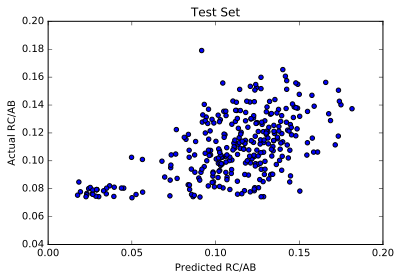

In [24]:
plt.scatter(Ytest, preds_test)
plt.title("Test Set")
plt.xlabel("Predicted RC/AB")
plt.ylabel("Actual RC/AB")

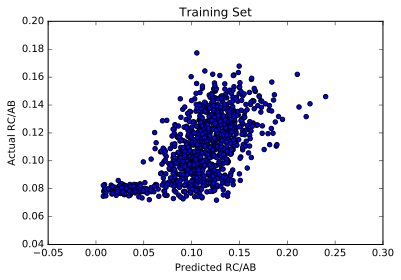

In [25]:
plt.scatter(Ytrain, preds_train)
plt.title("Training Set")
plt.xlabel("Predicted RC/AB")
plt.ylabel("Actual RC/AB")

In [29]:
#Get R2 scores for each set
print("Training R2:")
print(MLP.score(Xtrain, Ytrain))
print("\n")
print("Test R2:")
print(MLP.score(Xtest, Ytest))

Training R2:
0.381141984121


Test R2:
0.29110214475
